In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


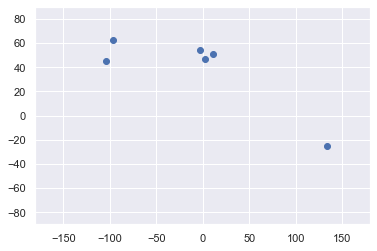

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [4]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
kmeans = KMeans(4)

In [6]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 0, 1, 1, 1, 2])

In [7]:
data_with_clusters = data.copy()

In [8]:
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,3
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


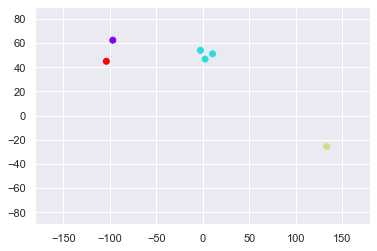

In [9]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [10]:
raw_data = pd.read_csv('Countries-exercise.csv')

In [11]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [12]:
data = raw_data.copy()

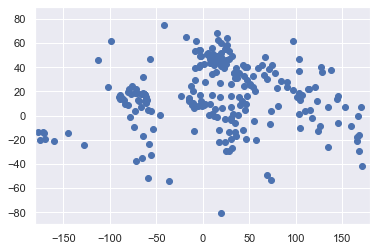

In [13]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [14]:
x = data.iloc[:, 1:3]

In [15]:
kmeans = KMeans(7)

In [16]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
identified_clusters = kmeans.fit_predict(x)

In [18]:
data_with_clusters = data.copy()

In [19]:
data_with_clusters['Cluster'] = identified_clusters

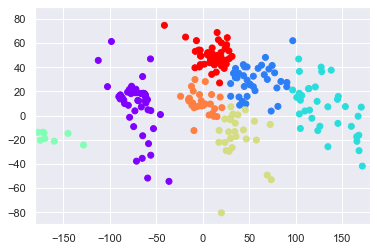

In [20]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c =data_with_clusters['Cluster'], cmap ='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [21]:
data = pd.read_csv('3.01. Country clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [22]:
data['Language'].unique()

array(['English', 'French', 'German'], dtype=object)

In [23]:
data_mapped = data.copy()

In [24]:
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French' :1, 'German':2})

In [25]:
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [26]:
kmeans = KMeans(3)

In [27]:
x = data_mapped.iloc[:, 1:4]

In [28]:
identified_clusters = kmeans.fit_predict(x)

In [29]:
data_with_clusters = data_mapped.copy()

In [30]:
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


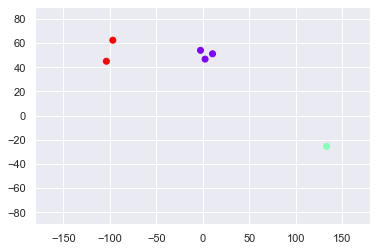

In [31]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c = data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [32]:
kmeans.inertia_

290.10523333333333

In [33]:
wcss = []
for i in range(1,7):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [34]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

In [35]:
number_cluster = range(1,7)

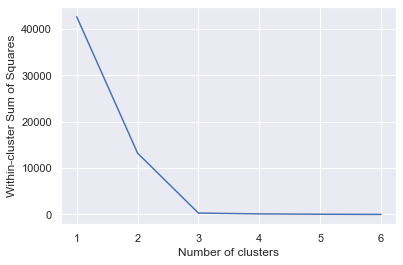

In [36]:
plt.plot(number_cluster, wcss)

plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [37]:
data = pd.read_csv("Country clusters standardized.csv", index_col = 'Country')

In [38]:
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [39]:
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'],axis=1)

In [40]:
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


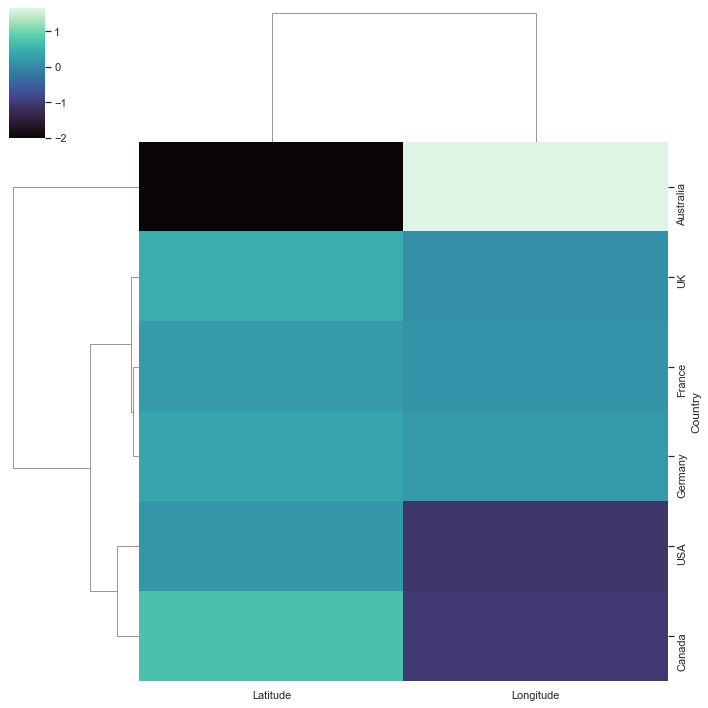

In [42]:
sns.clustermap(x_scaled, cmap = 'mako')
plt.show()